<a href="https://colab.research.google.com/github/Mateusz-best-creator/Learning_ML/blob/main/Book_Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

In [ ]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [ ]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [ ]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=3),
                                   StandardScaler(),
                                   LinearSVC(C=10, max_iter=10000, random_state=42))
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

## Polynomial Kernel

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

## Gaussian Similarity

In [ ]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5., C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5.0))])

## SVM Regression

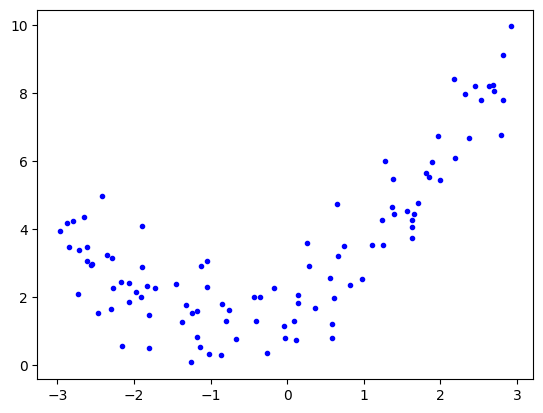

In [ ]:
from sklearn.svm import LinearSVR
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.plot(X.ravel(), y.ravel(), 'b.');

In [ ]:
svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5))
svm_reg.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5))])

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=3, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, kernel='poly'))])

# Exercises

1. Fundamental idea behind SVMs is that we try to limit margin violations while having as wide street as possible (soft margin classification).

2. Support vectors are points which boundary of our street touches.

3. It is imporatant to scale features when using SVM beacuse it's then easier to find nice decision boundary.

4. SVM can output confidence score, it can output probability if **probability** parameter is set to true.

5. LinearSVC and SGDClassifier scale better to big datasets, SVC supports kernel trick, they all require scaling, only SGDClassifier support out-of-core method.

6. You should increase C and increase gamma.

7. epsilon-insentitive means that new points inside margin to do not influence model predictions.

8. The point of using the kernel trick is that we can increase our data degree without actually transforming it at all.

## Exercise 9

In [ ]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
# Let's train each type of SVM classifier: SVC, SGDClassifier, LinearSVC
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
svc_clf = SVC(kernel="linear")
linear_svc_clf = LinearSVC()
sgd_clf = SGDClassifier(penalty="l2", alpha=0.01)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svc_clf.fit(X_train, y_train)
linear_svc_clf.fit(X_train, y_train)
sgd_clf.fit(X_train, y_train);

In [ ]:
print(f"SVC = {svc_clf.score(X_test, y_test)}")
print(f"Linear SVC = {linear_svc_clf.score(X_test, y_test)}")
print(f"SGD = {sgd_clf.score(X_test, y_test)}")

SVC = 1.0
Linear SVC = 1.0
SGD = 1.0


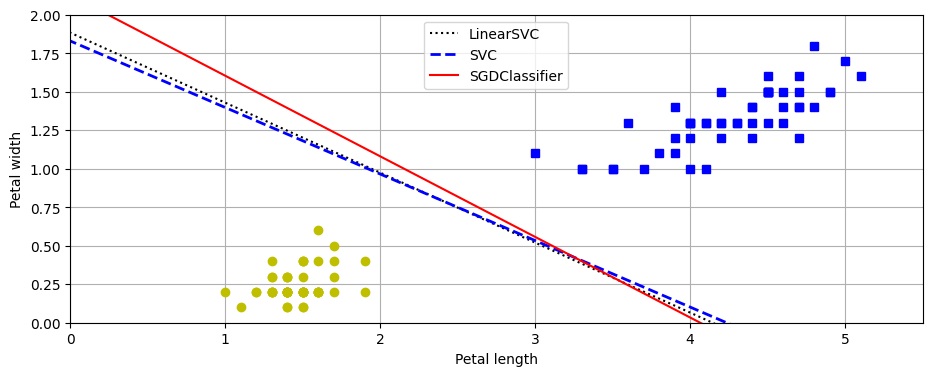

In [ ]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(linear_svc_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

## Exercise 10

In [ ]:
from sklearn.datasets import load_wine

wine_data = load_wine(as_frame=True)
data = wine_data.data
target = wine_data.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

<Figure size 1200x1200 with 0 Axes>

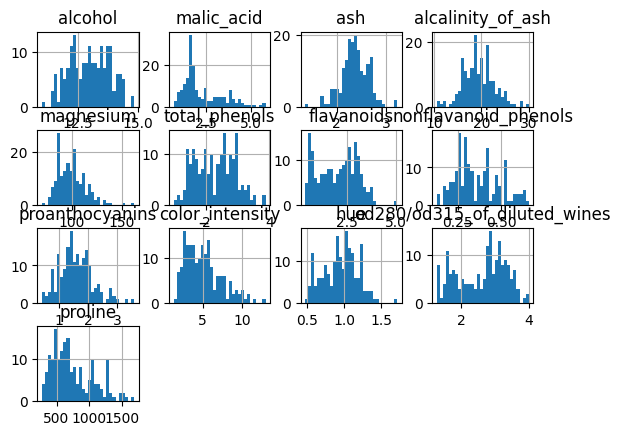

In [ ]:
plt.figure(figsize=(12, 12))
data.hist(bins=30)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [ ]:
model = make_pipeline(StandardScaler(),
                      SVC(C=1))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9777777777777777

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf']}

grid = GridSearchCV(model,
                    param_grid,
                    refit = True,
                    verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.407 total time=   0.0s
[CV 2/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.370 total time=   0.0s
[CV 3/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.407 total time=   0.0s
[CV 4/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.423 total time=   0.0s
[CV 5/5] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf;, score=0.423 total time=   0.0s
[CV 1/5] END svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf;, score=0.926 total time=   0.0s
[CV 3/5] END svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf;, score=0.889 total time=   0.0s
[CV 4/5] END svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf;, score=0.962 total time=   0.0s
[CV 5/5] END svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END svc__C=0.1, svc__gamma=0.01, svc__k

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(C=1))]),
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svc__kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [ ]:
y_test[:10]

71     1
81     1
153    2
111    1
120    1
51     0
149    2
96     1
59     1
176    2
Name: target, dtype: int64

In [ ]:
from sklearn.metrics import f1_score

best_SVC = grid.best_estimator_
svc_predictions = best_SVC.predict(X_test)
print(f"F1 = {f1_score(y_true=y_test, y_pred=svc_predictions, average='weighted')}")

F1 = 0.9775661375661375


## Exercise 11

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data = housing.data
target = housing.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
target[:10]

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
Name: MedHouseVal, dtype: float64

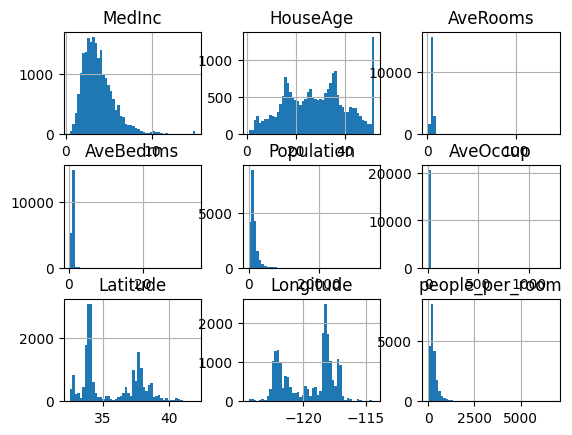

In [ ]:
data.hist(bins=50)
plt.show()

In [ ]:
# Let's create some additional features
data["people_per_room"] = data["Population"] / data["AveRooms"]
data["bedrooms_per_people"] = data["AveBedrms"] / data["AveRooms"]

In [ ]:
temp_data = data.copy()
temp_data["HousePrice"] = target.copy()
temp_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,people_per_room,bedrooms_per_people,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,46.104545,0.146591,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,384.890548,0.155797,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,59.844581,0.129516,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,95.919937,0.184458,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,89.941610,0.172096,3.422


In [ ]:
temp_data.corr()["HousePrice"].sort_values(ascending=False)

HousePrice             1.000000
MedInc                 0.688075
AveRooms               0.151948
HouseAge               0.105623
AveOccup              -0.023737
Population            -0.024650
Longitude             -0.045967
AveBedrms             -0.046701
people_per_room       -0.089313
Latitude              -0.144160
bedrooms_per_people   -0.255624
Name: HousePrice, dtype: float64

We can see that `MedInc` is relevant to our price, we will use stratified sampling to ensure that each set conatains same amount of these values.

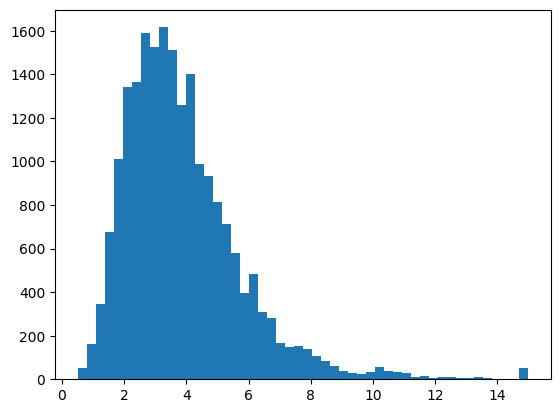

In [ ]:
plt.hist(data["MedInc"], bins=50);

In [ ]:
import pandas as pd
data["IncomeBins"] = pd.cut(x=data["MedInc"], bins=[0, 2., 4., 6., 8., np.inf])
data["IncomeBins"].value_counts() / len(data)

IncomeBins
(2.0, 4.0]    0.489147
(4.0, 6.0]    0.277374
(0.0, 2.0]    0.119041
(6.0, 8.0]    0.081008
(8.0, inf]    0.033430
Name: count, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=data["IncomeBins"])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 11), (4128, 11), (16512,), (4128,))

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=X_train["IncomeBins"])
X_train["IncomeBins"].value_counts() / len(X_train)

IncomeBins
(2.0, 4.0]    0.489136
(4.0, 6.0]    0.277387
(0.0, 2.0]    0.119010
(6.0, 8.0]    0.081005
(8.0, inf]    0.033462
Name: count, dtype: float64

In [ ]:
X_train.drop("IncomeBins", axis=1, inplace=True)
X_valid.drop("IncomeBins", axis=1, inplace=True)
X_test.drop("IncomeBins", axis=1, inplace=True)

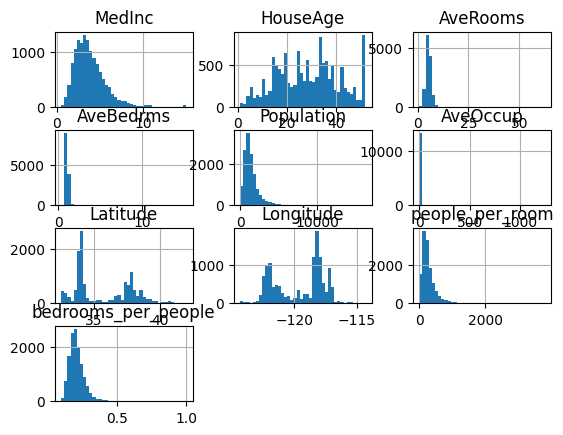

In [ ]:
X_train.hist(bins=40);

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVR

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             StandardScaler())
log_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                 FunctionTransformer(func=np.log, inverse_func=np.exp),
                                 StandardScaler())

preprocessing = ColumnTransformer([
    ("log", log_num_pipeline, ["MedInc", "AveRooms", "AveBedrms", "Population", "people_per_room", "bedrooms_per_people"]),
], remainder=num_pipeline)

final_svc = make_pipeline(preprocessing, SVR())

In [ ]:
from sklearn.model_selection import cross_val_score

scores = -cross_val_score(estimator=final_svc,
                          X=X_train,
                          y=y_train,
                          scoring="neg_root_mean_squared_error",
                          cv=3,
                          verbose=3)
print(scores)

[CV] END ............................... score: (test=-0.606) total time=   5.5s
[CV] END ............................... score: (test=-0.589) total time=   7.1s
[CV] END ............................... score: (test=-0.629) total time=   5.6s
[0.60556061 0.58884477 0.62868015]


In [ ]:
param_grid = {'svr__C': [0.1, 1, 10, 100, 1000],
              'svr__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svr__kernel': ['rbf']}

grid = GridSearchCV(final_svc,
                    param_grid,
                    refit = True,
                    cv=3,
                    verbose = 3)

# fitting the model for grid search
grid.fit(X_train[:2500], y_train[:2500])

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END svr__C=0.1, svr__gamma=1, svr__kernel=rbf;, score=0.280 total time=   0.2s
[CV 2/3] END svr__C=0.1, svr__gamma=1, svr__kernel=rbf;, score=0.301 total time=   0.2s
[CV 3/3] END svr__C=0.1, svr__gamma=1, svr__kernel=rbf;, score=0.223 total time=   0.2s
[CV 1/3] END svr__C=0.1, svr__gamma=0.1, svr__kernel=rbf;, score=0.603 total time=   0.2s
[CV 2/3] END svr__C=0.1, svr__gamma=0.1, svr__kernel=rbf;, score=0.639 total time=   0.2s
[CV 3/3] END svr__C=0.1, svr__gamma=0.1, svr__kernel=rbf;, score=0.530 total time=   0.2s
[CV 1/3] END svr__C=0.1, svr__gamma=0.01, svr__kernel=rbf;, score=0.479 total time=   0.2s
[CV 2/3] END svr__C=0.1, svr__gamma=0.01, svr__kernel=rbf;, score=0.523 total time=   0.2s
[CV 3/3] END svr__C=0.1, svr__gamma=0.01, svr__kernel=rbf;, score=0.422 total time=   0.2s
[CV 1/3] END svr__C=0.1, svr__gamma=0.001, svr__kernel=rbf;, score=0.148 total time=   0.3s
[CV 2/3] END svr__C=0.1, svr__gamma=0.00

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('log',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(func=<ufunc 'log'>,
                                                                                                              inverse_func=<ufunc 'exp'>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['MedInc',
                                                                          'AveRooms',
                                                                          'AveBedrms',
                                                                          'Population',
                                                                          'people_per_room',
                                                                          'bedrooms_per_people'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1, 10, 100, 1000],
                         'svr__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svr__kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_, grid.best_estimator_

({'svr__C': 10, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'},
 Pipeline(steps=[('columntransformer',
                  ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                               SimpleImputer(strategy='median')),
                                                              ('standardscaler',
                                                               StandardScaler())]),
                                    transformers=[('log',
                                                   Pipeline(steps=[('simpleimputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('functiontransformer',
                                                                    FunctionTransformer(func=<ufunc 'log'>,
                                                                                        inverse_func=<ufunc 'exp'>)

In [ ]:
best_svr = grid.best_estimator_

In [ ]:
scores_svr = -cross_val_score(estimator=best_svr,
                          X=X_train,
                          y=y_train,
                          scoring="neg_root_mean_squared_error",
                          cv=3,
                          verbose=3)
print(scores_svr)

[CV] END ............................... score: (test=-0.591) total time=  10.7s
[CV] END ............................... score: (test=-0.569) total time=   9.7s
[CV] END ............................... score: (test=-0.599) total time=  10.2s
[0.59083931 0.56860939 0.5994242 ]


In [ ]:
from sklearn.metrics import mean_squared_error

best_svr.fit(X_train, y_train)
print(f"RMSE on validation set = {mean_squared_error(y_valid, best_svr.predict(X_valid), squared=False)}")

RMSE on validation set = 0.5776635766973006


In [ ]:
X_full = pd.concat([X_train, X_valid], axis=0)
y_full = pd.concat([y_train, y_valid], axis=0)

best_svr.fit(X_full, y_full)
print(f"RMSE on test set = {mean_squared_error(y_test, best_svr.predict(X_test), squared=False)}")

RMSE on validation set = 0.5688566878094117
